# Regression with multiple variables

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import linear_model

#%matplotlib widget

In the previous chapter we have looked at simple regression where one target is predicted with a feature. We have also seen that we could make the regression more complex by adding polynomial terms. In fact what we did was to add artificial features (that happen to be powers of the original feature) to our regression. This is a specific case of **multiple regression** where multiple features are used to predict a target. Here we'll see the standard case with the wine dataset:

In [7]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [8]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The above dataset is composed of a series of wines that were graded and whose composition was analyzed. We can use this dataset as a toy example to see if we can predict certain variable with others. For example we can check if we can predict the wine ```fixed acidity``` using first either the ```density``` or the ```pH```. If we recap what we did before this means using a model of the type $y = w_0 + w_1 * var_1$ where $var_1$ is ```density``` or ```pH```:

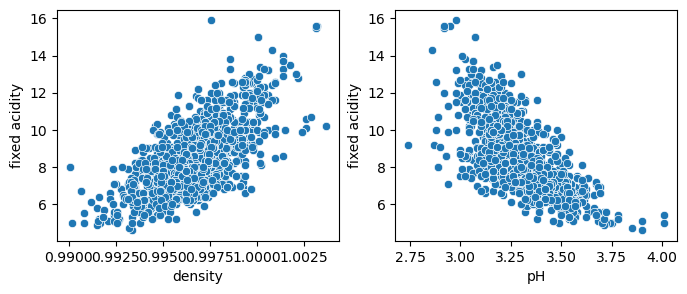

In [9]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.scatterplot(wine, x='density', y='fixed acidity', ax=ax[0])
sns.scatterplot(wine, x='pH', y='fixed acidity', ax=ax[1]);

We see above that both variables are correlated with the ```fixed acidity```, so we should be able to model them with linear regression. 

In [10]:
y = wine['fixed acidity']
X_1 = wine[['density']]
X_1b = wine[['pH']]

model_1 = linear_model.LinearRegression()
model_1b = linear_model.LinearRegression()

model_1.fit(X=X_1, y=y)
model_1b.fit(X=X_1b, y=y)

LinearRegression()

In [11]:
model_1.coef_

array([616.28450984])

/Users/gw18g940/mambaforge/envs/DAVPy2023/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/gw18g940/mambaforge/envs/DAVPy2023/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


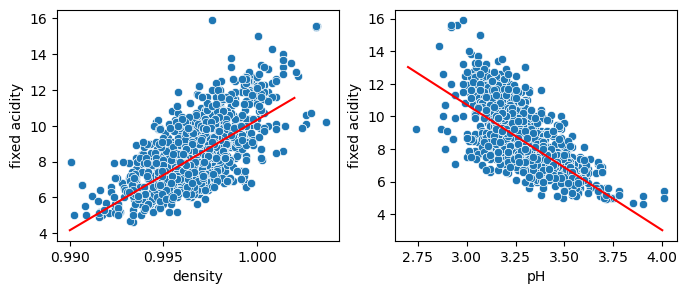

In [12]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
sns.scatterplot(wine, x='density', y='fixed acidity', ax=ax[0])
X_pred = np.linspace(0.99, 1.002, 10)[:, np.newaxis]
sns.lineplot(x=X_pred.flatten(), y=model_1.predict(X_pred), ax=ax[0], color='red')

sns.scatterplot(wine, x='pH', y='fixed acidity', ax=ax[1]);
X_pred = np.linspace(2.7, 4, 10)[:, np.newaxis]
sns.lineplot(x=X_pred.flatten(), y=model_1b.predict(X_pred), ax=ax[1], color='red');

As we only use a single variable, we are bound to predict data on that line. But we can now **combine** these two features and use an equation like:  $y = w_0 + w_1 * var_1 + w_2 * var_2$, where we now have **two weights** (plus bias) to adjust. Hence when we predict ```fixed acidity``` at a given ```density```, we have one "knob" more to adjust which depends on the ```pH```, allowing us to recreate the actual cloud of points instead of a single line. First we redefine ```X``` to contain multiple features:

In [13]:
y = wine['fixed acidity']
X_2 = wine[['density', 'pH']]
X_2.head(5)

,density,pH
0,0.9978,3.51
1,0.9968,3.20
2,0.9970,3.26
3,0.9980,3.16
4,0.9978,3.51


Now we fit the model:

In [14]:
model_two = linear_model.LinearRegression()
model_two.fit(X=X_2, y=y)

LinearRegression()

In [15]:
model_two.coef_

array([454.00256506,  -5.80584718])

In [16]:
model_two.intercept_

-424.98209456611954

We see that now we have two values for ```coef_```, one for each independent variable. We also see that now the parameter $w_1$ for ```density``` is slightly different from before (616 vs. 454). This is normal: we are trying to optimize for the two variables at the same time! Let's check the plots:

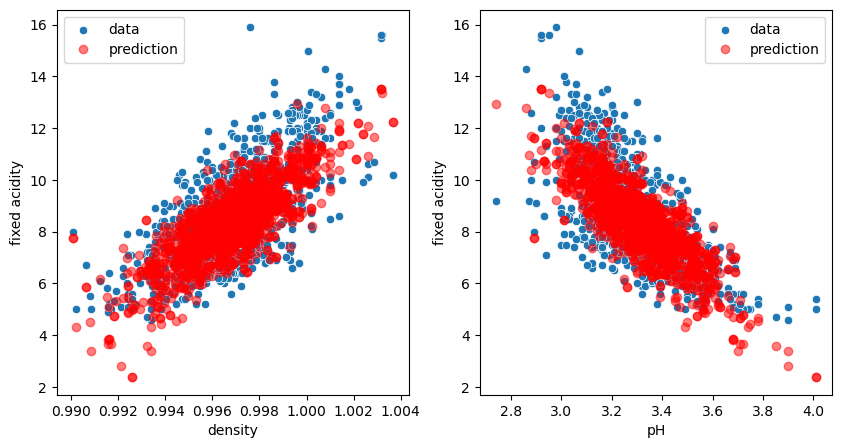

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=wine, x='density', y='fixed acidity', label='data', ax=ax[0]);
ax[0].plot(X_2.density, model_two.predict(X_2), 'ro', alpha=0.5, label='prediction');
sns.scatterplot(data=wine, x='pH', y='fixed acidity', label='data', ax=ax[1]);
ax[1].plot(X_2.pH, model_two.predict(X_2), 'ro', alpha=0.5, label='prediction');
ax[0].legend();
ax[1].legend();

We see that our model predicts now clouds of points matching the real distribution. In fact we don't really have a cloud of points. Our model predicts a plane, but when projecting certain points of this plane on specific axes, we see these clouds!

We can however still represent our data as we can draw points in 3D, the third dimension being our predicted feature. Then we can look at the 3D plot perpendicularly to one axis and we recover the plots we have above. This is what is done below where we actually use a grid of values for the two features, to make it clear that we are dealing with a plane:

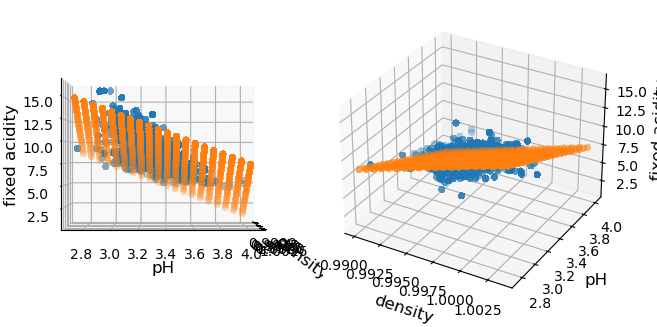

In [19]:
fig = plt.figure()

X_1_grid, X_2_grid = np.meshgrid(
    np.linspace(wine.density.min(), wine.density.max(),20),
    np.linspace(wine.pH.min(), wine.pH.max(),20)
)
y_pred = model_two.predict(pd.DataFrame({'density': X_1_grid.ravel(), 'pH': X_2_grid.ravel()}))

x_1 = X_2.density.values
x_2 = X_2.pH.values
x_3 = y.values

ax1 = fig.add_subplot(1, 2, 1, projection='3d',computed_zorder=False)
ax2 = fig.add_subplot(1, 2, 2, projection='3d',computed_zorder=False)
axes = [ax1, ax2]
for ax in axes:
    # Plot the surface.
    surf = ax.scatter(x_1, x_2, x_3, linewidth=0, antialiased=False)

    surf = ax.scatter(X_1_grid, X_2_grid, y_pred, linewidth=0, antialiased=False)

    ax.set_xlabel('density', fontdict={'fontsize':12})
    ax.set_ylabel('pH', fontdict={'fontsize':12});
    ax.set_zlabel('fixed acidity', fontdict={'fontsize':12});
ax1.view_init(elev=0., azim=0)
fig.tight_layout()

## Quality of model

We see from the plots that the model fits better the data. But we can also actually measure it. For this we define a metric. For regression, this is typically the average distance between the actual point locations and their predictions by the model e.g.

In [20]:
np.mean((model_1.predict(X_1) - y)**2)

1.6774843637798655

In [21]:
np.mean((model_two.predict(X_2) - y)**2)

0.9683027681722144

To avoid having to redefine these metrics manually, those can be directly loaded from the ```metrics``` module:

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(model_1.predict(X_1), y)

1.6774843637798655

In [24]:
mean_squared_error(model_two.predict(X_2), y)

0.9683027681722144

## Features of different "sizes"

One potential problem when using multiple variables, is that they might not all have the same magnitude. For example in the ```wine``` dataset we see that there's an order of magnitude difference between ```fixed acidity``` and ```volatile acidity```. The problem with this is that since we try to minimize the distance from our model to our datapoints *jointly* for all features, in certain cases those differences might give a larger weight to one or the other feature. For example if instead of ```LinearRegressor``` we use the ```Ridge``` regressor, the fit will fail with the original data:

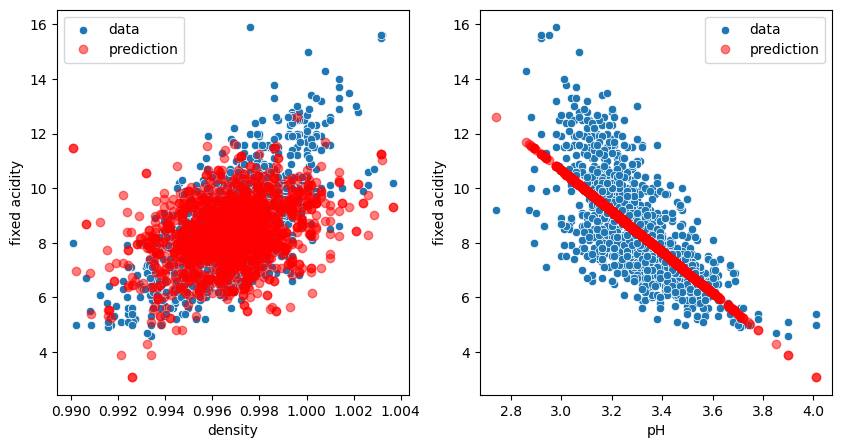

In [25]:
model = linear_model.Ridge(alpha=1)

res_ridge = model.fit(X=X_2, y=y)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=wine, x='density', y='fixed acidity', label='data', ax=ax[0]);
ax[0].plot(X_2.density, res_ridge.predict(X_2), 'ro', alpha=0.5, label='prediction');
sns.scatterplot(data=wine, x='pH', y='fixed acidity', label='data', ax=ax[1]);
ax[1].plot(X_2.pH, res_ridge.predict(X_2), 'ro', alpha=0.5, label='prediction');
ax[0].legend();
ax[1].legend();

Ridge regression tries to make sure that we don't over-interpret our data and have suddenly one feature that becomes exceedingly important. Therefore we have to first make sure that all features are "equivalent". For that we can *normalize* them, i.e. ensuring that they have a mean value of 0 and a standard deviation of 1. In the example below we have two variables, one centered around 4, the other around 10, and one has a width of about 10 and the other 2.

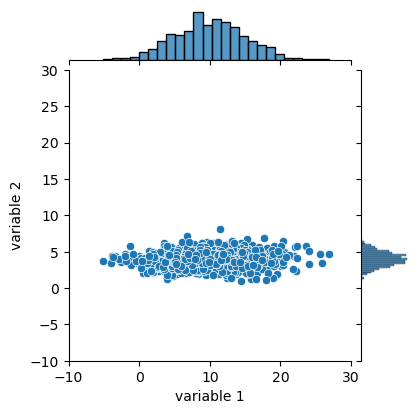

In [26]:
variables = pd.DataFrame({
    'variable 1': np.random.normal(loc=10, scale=5, size=1000),
    'variable 2': np.random.normal(loc=4, scale=1, size=1000)})
jpl = sns.jointplot(data=variables,
              x='variable 1', y='variable 2', xlim=(-10,30), ylim=(-10,30)
)
jpl.figure.set_size_inches(w=4, h=4)

The goal is to transform these points so that they have similar distributions. For that we have to shift them (subtraction) so that they are centered around 0 and divide them by a certain factor so that they have the same width:

In [27]:
variables['variable 1'] = (variables['variable 1'] - np.mean(variables['variable 1'])) / np.std(variables['variable 1'])
variables['variable 2'] = (variables['variable 2'] - np.mean(variables['variable 2'])) / np.std(variables['variable 2'])

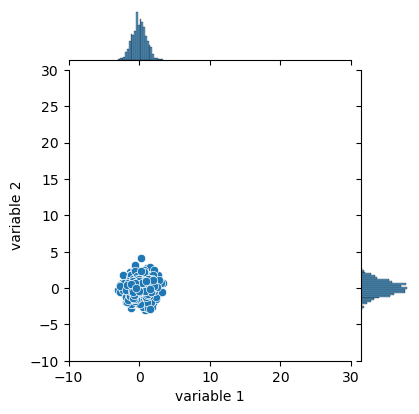

In [28]:
jpl = sns.jointplot(data=variables,
              x='variable 1', y='variable 2', xlim=(-10,30), ylim=(-10,30)
)
jpl.figure.set_size_inches(w=4, h=4)

Instead of doing this operation manually we can use a ```preprocessing``` function from sklearn:

In [29]:
from sklearn import preprocessing

Here we use the ```StandardScaler``` to normalize. It works the same way as the models:
1. Instantiate it
2. fit the data. In this case we need to fit (compute the mean and standard deviation) **and** transform the data. So we use the ```fit_transform``` function instead of just ```fit```

We can pass directly our whole DataFrame. As the output is just a Numpy array, we transform it back to a DataFrame:

In [30]:
sc = preprocessing.StandardScaler()
wine_scaled = pd.DataFrame(sc.fit_transform(wine), columns=wine.columns)

Let's make a histogram of before/after normalization of the ```pH```:

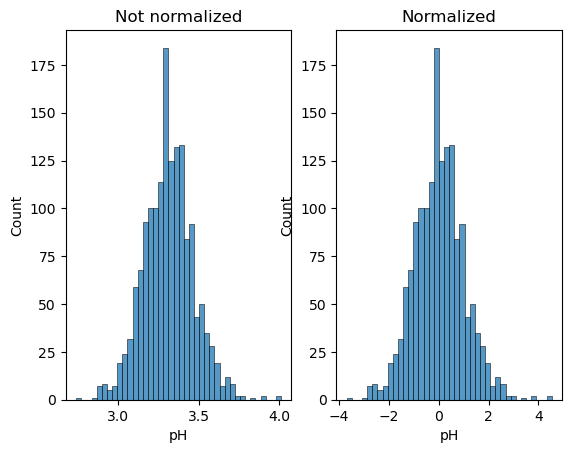

In [31]:
fig, ax = plt.subplots(1, 2)
sns.histplot(wine.pH, ax=ax[0])
sns.histplot(wine_scaled.pH, ax=ax[1])
ax[0].set_title('Not normalized')
ax[1].set_title('Normalized');

We see that it doesn't affect the shape of the distribution, just its scale. Now we can try again our fit:

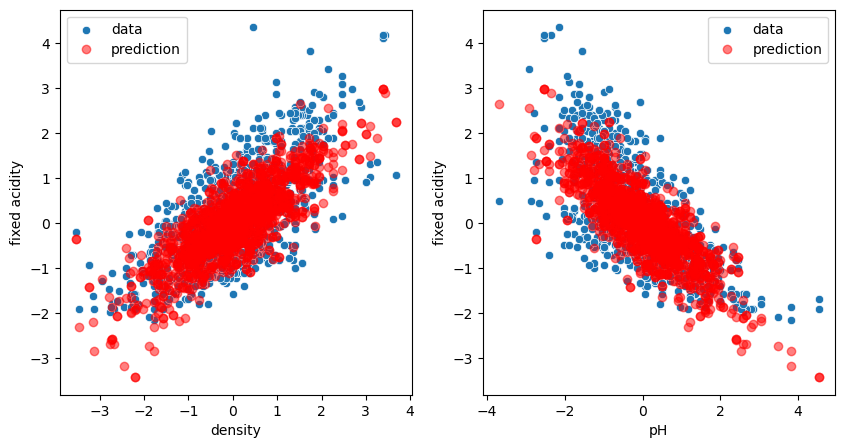

In [32]:
X_2_scaled = wine_scaled[['density', 'pH']]
y_scaled = wine_scaled['fixed acidity']

model = linear_model.Ridge()

res_ridge = model.fit(X=X_2_scaled, y=y_scaled)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=wine_scaled, x='density', y='fixed acidity', label='data', ax=ax[0]);
ax[0].plot(X_2_scaled.density, res_ridge.predict(X_2_scaled), 'ro', alpha=0.5, label='prediction');
sns.scatterplot(data=wine_scaled, x='pH', y='fixed acidity', label='data', ax=ax[1]);
ax[1].plot(X_2_scaled.pH, res_ridge.predict(X_2_scaled), 'ro', alpha=0.5, label='prediction');
ax[0].legend();
ax[1].legend();

## Exercise

1. Import the housing.csv dataset. This dataset contains information about houses sold in Kings County (California) such as price, surface etc.

2. Predict the ```price``` using first only the ```grade``` and then the ```grade```, ```bedrooms``` and ```bathrooms``` columns

3. Compute the mean square error for both models. Which one is better and did it improve a lot?

4. Make a pairplot with the ```bedrooms```, ```grade``` and ```price``` columns. Do you see anything special regarding the ```bedrooms``` data? If yes try to fix it and rerun the above analysis. What do you observe?